In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [10]:
# import rasterio
# import pandas as pd
# from os import listdir
# from tqdm import tqdm
import xarray
import numpy as np
from os import listdir
import pandas as pd
import nbimporter
import utils
from scipy.interpolate import RBFInterpolator
# from scipy.interpolate import 
import matplotlib.pyplot as plt

In [11]:
# file_path = 'data/GOES/noaa-goes16/ABI-L1b-RadC/2023/268/16/OR_ABI-L1b-RadC-M6C01_G16_s20232681601174_e20232681603547_c20232681603586.nc'
xds = xarray.open_dataset('data/resampled4.nc')
# xds = xarray.open_dataset(file_path)


lat, lon = utils.calculate_degrees(xds)
coords = np.dstack((lat, lon))
rad = xds['Rad'].data
blank = np.zeros_like(rad)
size = 10
path = 'data/CRN'
for f in listdir(path):
    # print(f)
    df = pd.read_csv(path+'/'+f)
    
    break
df.head
station_data = []
for idx, row in df.iterrows():
    if lat.min() <= row['LATITUDE'] and row['LATITUDE'] <= lat.max() and lon.min() <= row['LONGITUDE'] and row['LONGITUDE'] <= lon.max():
        station_data.append((row['LATITUDE'], row['LONGITUDE'], row['AIR_TEMPERATURE']))
        
station_data = np.array(station_data)
station_data[...,:-1]
station_data[...,-1]


# X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
station_data = np.array(station_data)
# station_data[...,:-1]
# station_data[...,-1]

# interp = CloughTocher2DInterpolator(list(zip(x, y)), z)
# interp = CloughTocher2DInterpolator(station_data[...,:-1], station_data[...,-1])
# interp = RegularGridInterpolator(station_data[...,:-1], station_data[...,-1],

#                                  bounds_error=False, fill_value=None)
# Z = interp(lat, lon)

# plt.pcolormesh(lat, lon, Z, shading='auto')
# grid_z0 = griddata(station_data[...,:-1], station_data[...,-1], (lat, lon), method='linear')
# plt.imshow(grid_z0)
# rad = Z
# rad = grid_z0 . 
# Type of RBF. This should be one of

#         ‘linear’ : -r

#         ‘thin_plate_spline’ : r**2 * log(r)

#         ‘cubic’ : r**3

#         ‘quintic’ : -r**5

#         ‘multiquadric’ : -sqrt(1 + r**2)

#         ‘inverse_multiquadric’ : 1/sqrt(1 + r**2)

#         ‘inverse_quadratic’ : 1/(1 + r**2)

#         ‘gaussian’ : exp(-r**2)


dense_points = np.stack([lat.ravel(), lon.ravel()], -1)  
rbf =RBFInterpolator(station_data[...,:-1], station_data[...,-1],  smoothing=1, kernel='linear', epsilon = 1)
rad = rbf(dense_points).reshape(lat.shape)
print(station_data[...,-1].mean(), rad.mean())

20.253787878787882 26.162380806375026


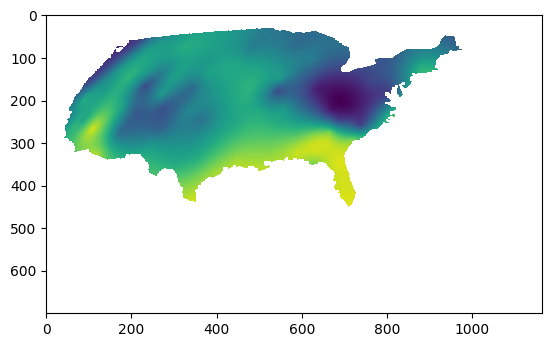

In [12]:
# plt.imshow(rad)
xds['Rad'].data = rad
masked = utils.mask_image(xds)
plt.imshow(masked)